# $$K-Nearest~ Neighbors (KNN)$$

### $$Conceito:$$


O **KNN**, é um método de aprendizagem supervisionada baseada em instâncias, do tipo classificador, não paramétrico, que utiliza **Lazy Learning** e possui **três elementos principais**: um conjunto de exemplos **rotulados**, uma **métrica de distância**, e o **valor de k** (o número de vizinhos mais próximos), o objetivo principal é classificar um dado (variável Target) através da distância de K-vizinhos(número de dados) mais próximos dele


A **aprendizagem baseada em instâncias** provém da **não** existência de um modelo construído a partir de uma base de dados de **treinamento** (até porque o KNN não possui uma etapa de treinamento, propriamente dito). O que se faz é **armazenar todos os dados (instâncias)** de treinamento, e a cada nova instância que se deseja classificar, cálculos comparativos são realizados entre esta e os demais dados já existentes.


**Lazy Classifier** = Os algoritmos do tipo lazy, não necessitam de dados de treinamento para se gerar o modelo, pois o algoritmo faz a previsão através das distâncias entre as features. Dadas novas amostras independentes, o que vai prevalecer é a distância entre as variáveis preditoras



**Célula Voronoi** = Cria uma Região geométrica ao redor de cada ponto de dado, para assim conseguir identificar um outro ponto de dado mais próximo a ele, com isso pode-se criar fronteiras que melhor forma a separação entre as classes de dados, porém a técnica é muito sensível a outliers









### $$Distâncias (Métricas):$$


**Antes de definir o K vizinhos mais próximos dos dados, precisamos saber quais métricas usar para calcular as distancias entre os pontos:**

- **Euclidiana** = É a distância em linha reta entre dois pontos de dados no espaço euclidiano, também é chamada de norma L2 ou distância L2.


- **Minkowski** = Forma generalizada da distância euclidiana e da distância de Manhattan, é normalmente usada com 'p' sendo 1 ou 2, que corresponde à distância de Manhattan e à distância euclidiana, respectivamente.


- **Manhattan** = É a soma das diferenças absolutas de suas coordenadas cartesianas, também é chamada com nomes diferentes, distância L1, norma L1, distância da cobra, distância do quarteirão da cidade, etc 


- **Hamming** = É usada para lidar com atributos categóricos, verifica se 2 atributos são iguais ou não, quando são iguais a distância é 0, caso contrário será 1.



### $$Caracteristica~ para~contrução~do~modelo~KNN:$$

**1°** - Definir a métrica para o cálculo da distância (Euclidiana, Minkowski, Manhattan, Hamming, etc)


**2°** - Definir o valor de K (Numero de vizinhos mais próximos que serão considerados pelo algoritimo)


**OBS: As medidas de distância são sensíveis a escala dos dados, por isso os dados em escalas diferentes precisam ser normalizados** 





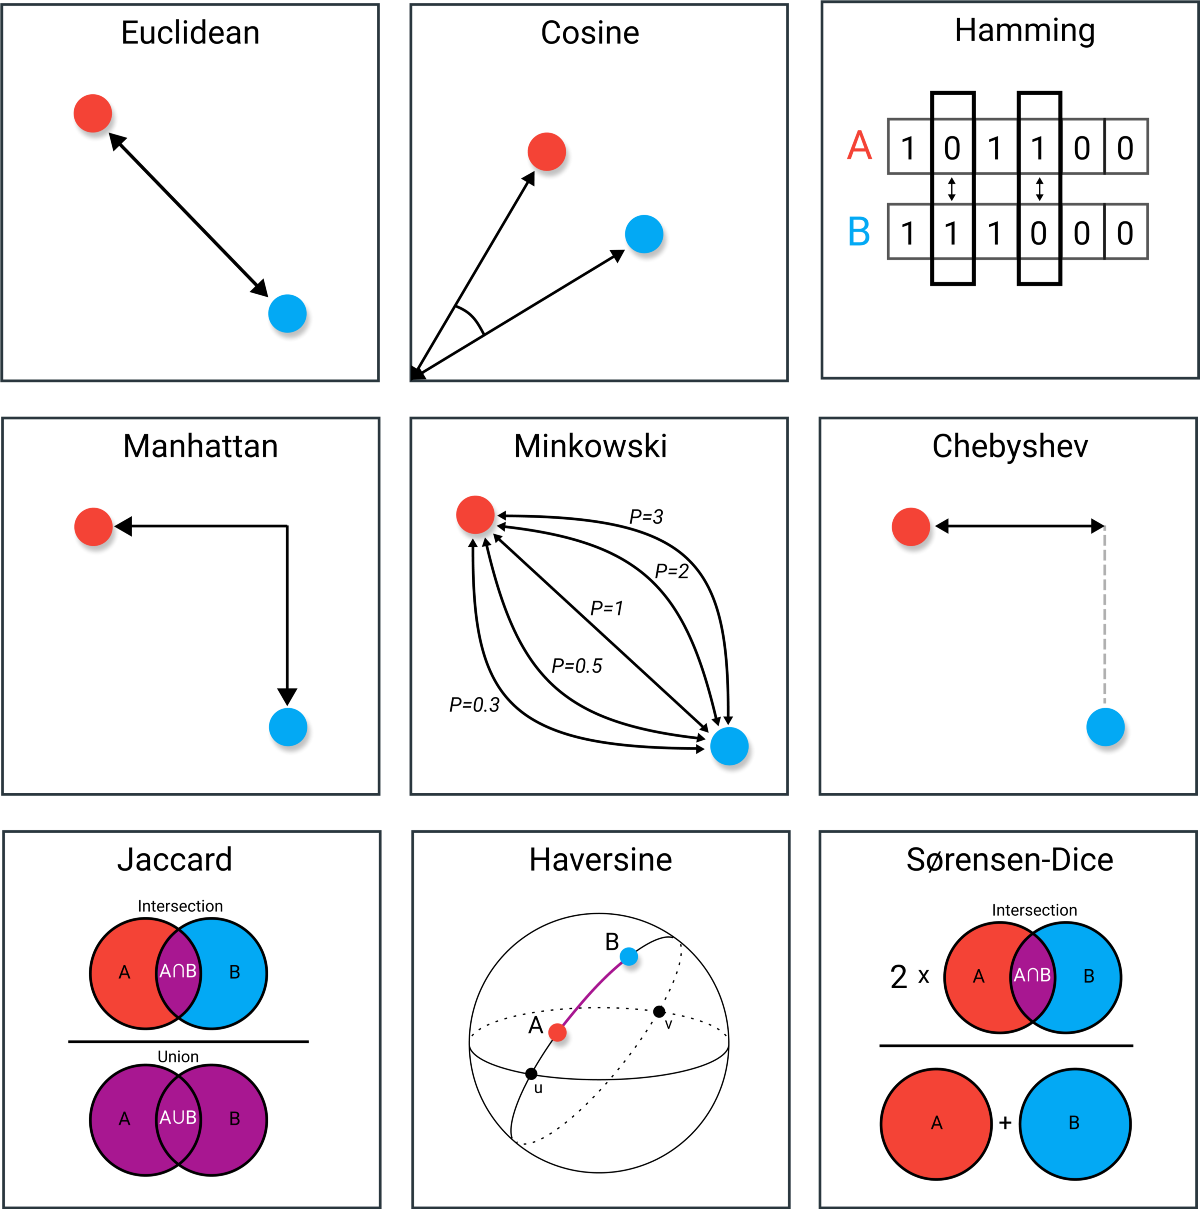

In [1]:
#Tipos de Distâncias
from IPython.display import Image
Image(filename="metric.png")

__------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------__


__------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------__

## $$Objetivo:$$  

## $$Identificar~ qual~ tipo~ de~ classe~ pertence~ os~ vinhos~ através~ das ~ features$$$$ usando~ o~ método ~de~ distância~ KNN$$

__------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------__


__------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------__

In [2]:
#Pacotes
import pandas as pd
import sklearn.datasets  as dataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score

# Carregar Banco de dados

In [3]:
#Dataset Wine
wine = dataset.load_wine()

x = pd.DataFrame(wine.data,columns=wine.feature_names)
y = pd.DataFrame(wine.target)

dados = x.join(y)
dados

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


**São 13 features que explicam 3 tipos de classes de vinhos**

# Análise Exploratória

In [4]:
#Info da tabela
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  0    

**Todas as variáveis são Quantitativas**

In [5]:
# Estatistica descritivas(Variáveis numericas)
dados.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,0
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


**Análise descritiva das variáveis quantitativas**

# Análise das variáveis

### Histograma da variável Target

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

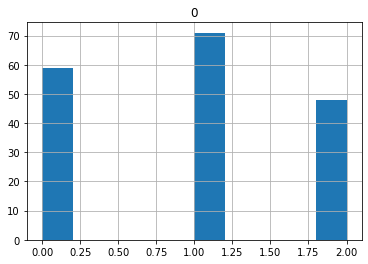

In [6]:
#Variável target
y.hist()

**Há um pequeno desbalanceamento das classes, porém não deve interferir no resultado final**

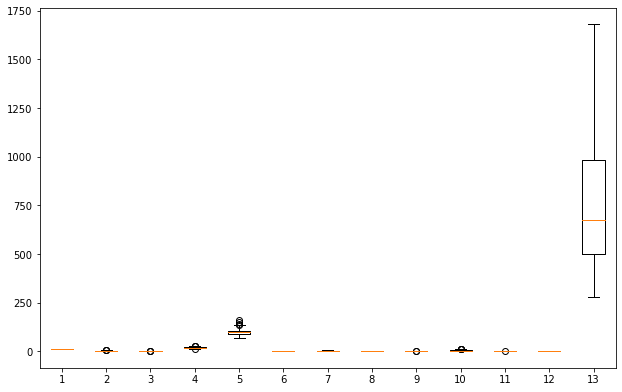

In [7]:
#BoxPlot
fig = plt.figure(figsize =(8, 5))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(x)
 
# show plot
plt.show()

**Dados em escalas diferentes, precisamos dimensionalizar (Padronizar ou normalizar) os dados para ficarem na mesma escala**

## Padronização dos dados

In [8]:
#Padronizar os dados
padro_x = (x - x.mean()) /  x.std()
padro_x

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.514341,-0.560668,0.231400,-1.166303,1.908522,0.806722,1.031908,-0.657708,1.221438,0.251009,0.361158,1.842721,1.010159
1,0.245597,-0.498009,-0.825667,-2.483841,0.018094,0.567048,0.731565,-0.818411,-0.543189,-0.292496,0.404908,1.110317,0.962526
2,0.196325,0.021172,1.106214,-0.267982,0.088110,0.806722,1.212114,-0.497005,2.129959,0.268263,0.317409,0.786369,1.391224
3,1.686791,-0.345835,0.486554,-0.806975,0.928300,2.484437,1.462399,-0.979113,1.029251,1.182732,-0.426341,1.180741,2.328007
4,0.294868,0.227053,1.835226,0.450674,1.278379,0.806722,0.661485,0.226158,0.400275,-0.318377,0.361158,0.448336,-0.037767
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.873810,2.966176,0.304301,0.300954,-0.331985,-0.982841,-1.420891,1.270726,-0.927563,1.139596,-1.388840,-1.227742,-0.021890
174,0.491955,1.408636,0.413653,1.049555,0.158126,-0.791103,-1.280731,0.547563,-0.316058,0.967055,-1.126341,-1.481267,0.009866
175,0.331822,1.739837,-0.388260,0.151234,1.418411,-1.126646,-1.340800,0.547563,-0.420888,2.217979,-1.607590,-1.481267,0.279786
176,0.208643,0.227053,0.012696,0.151234,1.418411,-1.030776,-1.350811,1.351077,-0.228701,1.829761,-1.563840,-1.396759,0.295664


**Dados Padronizados**

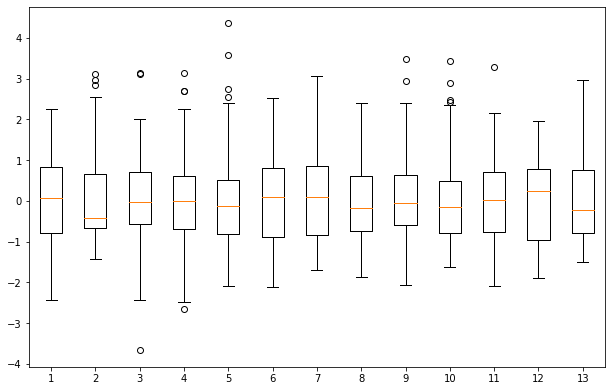

In [9]:
#BoxPlot
fig = plt.figure(figsize =(8, 5))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(padro_x)
 
# show plot
plt.show()

**Note que agora os valores dos dados estão todos na mesma escala**

**Modelo KNN requer que os dados estejam padronizados, para que não haja desequilíbrio no cálculo das distancias nas features com valores maiores**

# Modelagem:

## Configuração dos hiperparâmetros:

## Definir o Parâmetro K

**Definir o melhor valor de K através da métrica de acurácia usando 3 tipos de distância: euclidean, manhattan e minkowski**

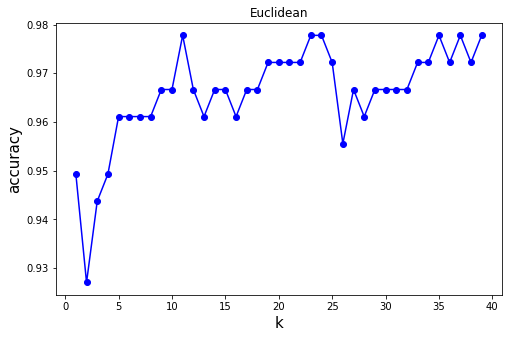

melhor k: 11 


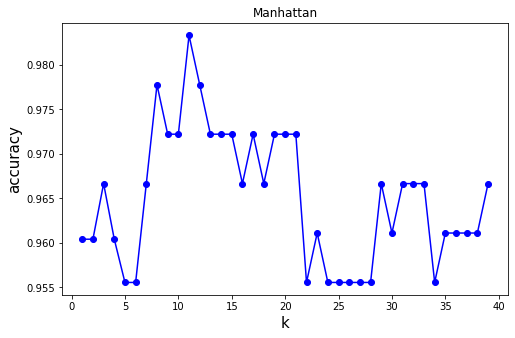

melhor k: 11 


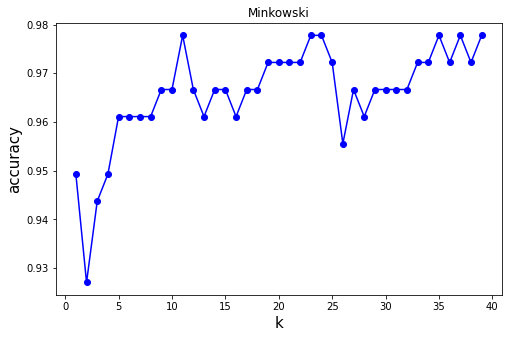

melhor k: 11 


In [10]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_validate

#euclidean
num_folds =20
vk =[]
vscore =[]
for k in range(1,40):
    model = KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    cv=cross_validate(model,padro_x,y,cv = num_folds)
    vscore.append(cv['test_score'].mean())
    vk.append(k)
    
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(8,5))
plt.plot(vk,vscore,'-bo')
plt.xlabel('k',fontsize=15)
plt.ylabel('accuracy',fontsize=15)
plt.title('Euclidean')
plt.show(True)
best_k=np.argmax(vscore)+1
print(f'melhor k: {best_k} ')


#manhattan
vk1 =[]
vscore1 =[]
for k in range(1,40):
    model = KNeighborsClassifier(n_neighbors=k,metric='manhattan')
    cv=cross_validate(model,padro_x,y,cv = num_folds)
    vscore1.append(cv['test_score'].mean())
    vk1.append(k)
    
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(8,5))
plt.plot(vk1,vscore1,'-bo')
plt.xlabel('k',fontsize=15)
plt.ylabel('accuracy',fontsize=15)
plt.title('Manhattan')
plt.show(True)
best_k=np.argmax(vscore1)+1
print(f'melhor k: {best_k} ')


#minkowski
vk2 =[]
vscore2 =[]
for k in range(1,40):
    model = KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    cv=cross_validate(model,padro_x,y,cv = num_folds)
    vscore2.append(cv['test_score'].mean())
    vk2.append(k)
    
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(8,5))
plt.plot(vk2,vscore2,'-bo')
plt.xlabel('k',fontsize=15)
plt.ylabel('accuracy',fontsize=15)
plt.title('Minkowski')
plt.show(True)
best_k=np.argmax(vscore2)+1
print(f'melhor k: {best_k} ')

**Observamos que para o conjunto de dados Wine padronizado o melhor valor de K = 11**

## Definir a melhor métrica de distância através do maior valor do score

**Vamos usar as mesmas 3 métricas de distância que usamos para encontrar o melhor valor de K**

In [11]:
#Método minkowski
import warnings
warnings.filterwarnings('ignore')

#GridSearchCV com KNN 
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier(metric='minkowski')
knn_cv= GridSearchCV(knn,param_grid,cv=20)
knn_cv.fit(padro_x,y)
print("Best Score: "+ str(round(knn_cv.best_score_*100,2)))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score: 97.78
Best Parameters: {'n_neighbors': 11}


**Método KNN com a métrica Minkowski**

In [12]:
#Método manhattan

import warnings
warnings.filterwarnings('ignore')

#GridSearchCV com KNN 
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier(metric='manhattan')
knn_cv= GridSearchCV(knn,param_grid,cv=20)
knn_cv.fit(padro_x,y)
print("Best Score: "+ str(round(knn_cv.best_score_*100,2)))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score: 98.33
Best Parameters: {'n_neighbors': 11}


**Método KNN com a métrica manhattan**

In [13]:
#Método euclidean
import warnings
warnings.filterwarnings('ignore')


#GridSearchCV com KNN 
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier(metric='euclidean')
knn_cv= GridSearchCV(knn,param_grid,cv=20)
knn_cv.fit(padro_x,y)
print("Best Score: "+ str(round(knn_cv.best_score_*100,2)))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score: 97.78
Best Parameters: {'n_neighbors': 11}


**Método KNN com a métrica euclidean**

## Conclusão:

**Entre as métricas: Euclidean, Manhattan e Minkowski a que apresentou a melhor acurácia foi: Manhattan, apesar de todas as métricas ficaram com os scores muito parecidos**

# Usar GridSearchCv  com todos os hiperparâmetros para encontrar o melhor modelo

**Com o GridSearch conseguimos definir os melhores hiperparâmetros de uma só vez**

In [14]:
#Definir os hiperparâmetros para serem treinados

#Definir o numero de vizinhos mais proximos com range de 1 a 50
k_list =list(range(1,50))

#Função de peso usada na previsão
weight_list=['uniform','distance']

#Parâmetro de potência para a métrica
p_list = [1,2,3]

#A métrica de distância a ser usada 
metric1=['minkowski','manhattan','euclidean']


In [15]:
#Transforma os parâmetros em um dicionario
parametros = dict(n_neighbors=k_list,weights = weight_list,p =p_list ,metric =metric1 )


#Instanciar o modelo KNN
knn_grid = KNeighborsClassifier()

#Instanciar o modelo junto com GridSearch
grid = GridSearchCV(knn_grid,parametros,cv =5 , scoring='accuracy' )

#Mostrar todos os hiperparametros testados
grid.fit(padro_x,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'manhattan', 'euclidean'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'p': [1, 2, 3], 'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [16]:
#OS Melhores parâmetros encontrados com a melhor média de acurácia
print(f'Melhores parametros: {grid.best_params_},\n\nMelhor Média de Acurácia: {round(grid.best_score_,3)}')

Melhores parametros: {'metric': 'minkowski', 'n_neighbors': 11, 'p': 1, 'weights': 'uniform'},

Melhor Média de Acurácia: 0.978


**Definimos as melhores métricas através do algoritmo Grid Search**

## Construir modelo 1 com os melhores hiperparâmetros encontrado com o algoritmo Grid Search

In [29]:
#Modelo 1 (Todas as variáveis padronizadas)

#Instanciar o modelo com os melhores parâmetros
knn_modelo1 = KNeighborsClassifier(n_neighbors=11 ,weights = 'uniform',p =1 ,metric ='minkowski')

#Treinar o modelo
knn_modelo1.fit(padro_x,y)

#Acuracia
acuracia = accuracy_score(y,knn_modelo1.predict(padro_x))
print(f'Acurácia do Modelo: {acuracia*100:.1f}%')

Acurácia do Modelo: 98.9%


## Avaliação do Modelo

### Matriz de confusão 

<AxesSubplot:>

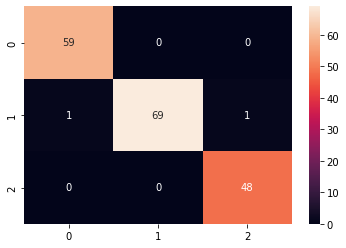

In [18]:
#Matriz de confusão
cm = confusion_matrix(y,knn_modelo1.predict(padro_x))
sns.heatmap(cm,annot=True,fmt='d')

In [19]:
#Mêtricas de avaliação
from sklearn.metrics import classification_report
print(classification_report(y,knn_modelo1.predict(padro_x)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        59
           1       1.00      0.97      0.99        71
           2       0.98      1.00      0.99        48

    accuracy                           0.99       178
   macro avg       0.99      0.99      0.99       178
weighted avg       0.99      0.99      0.99       178



**Note que o modelo obteve apenas 2 erros, isso significa que os dados se ajustaram bem ao algoritmo KNN e seus hiperparâmetros**

# Plotar o gráfico de fronteira


### Selecionar as 2 variáveis com maior correlação com a variável target para plotar no gráfico

In [20]:
#Correlação
cor = x.join(y).corr()[-1:].T
cor
cor.sort_values(0,ascending=True)

,0
flavanoids,-0.847498
od280/od315_of_diluted_wines,-0.788230
total_phenols,-0.719163
proline,-0.633717
hue,-0.617369
proanthocyanins,-0.499130
alcohol,-0.328222
magnesium,-0.209179
ash,-0.049643
color_intensity,0.265668


**As Variáveis são: flavanoids e diluted_wines**

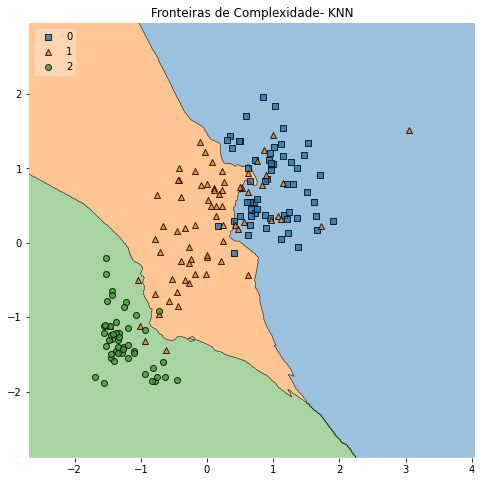

In [21]:
# Filtrar apenas as 2 features com mais correlação para serem plotadas no grafico bi-dimensional
xx = padro_x[['flavanoids','od280/od315_of_diluted_wines']].values
y = pd.DataFrame(y)
yy= y[0].values


from mlxtend.plotting import plot_decision_regions
def plot_fronteiras(n_vizinhos):
    knn =KNeighborsClassifier(n_neighbors=n_vizinhos)
    knn.fit(xx,yy)
    plt.figure(figsize=(8,8))
    plot_decision_regions(xx,yy,clf=knn,legend=2)
    plt.title('Fronteiras de Complexidade- KNN')
    
#Plotar a fronteira com o numero de K vizinhos 
plot_fronteiras(11)

**Podemos ver visualmente como as variáveis foram bem separadas, lembrando que estamos plotando apenas 2 variáveis, em um total de 13 usadas no modelo**

## Criar o modelo 2 selecionando apenas 5 variáveis do dataset que tem mais correlação com a variável target e verificar se conseguimos ter uma boa acurácia

In [22]:
#Correlação
cor = x.join(y).corr()
cor_5 = pd.DataFrame(cor.iloc[13,:].sort_values(ascending=True))
cor_5

,0
flavanoids,-0.847498
od280/od315_of_diluted_wines,-0.788230
total_phenols,-0.719163
proline,-0.633717
hue,-0.617369
proanthocyanins,-0.499130
alcohol,-0.328222
magnesium,-0.209179
ash,-0.049643
color_intensity,0.265668


In [23]:
#Selecionar as variáveis
var_x_5 = padro_x[['flavanoids','od280/od315_of_diluted_wines','total_phenols','proline','hue']]
var_x_5

,flavanoids,od280/od315_of_diluted_wines,total_phenols,proline,hue
0,1.031908,1.842721,0.806722,1.010159,0.361158
1,0.731565,1.110317,0.567048,0.962526,0.404908
2,1.212114,0.786369,0.806722,1.391224,0.317409
3,1.462399,1.180741,2.484437,2.328007,-0.426341
4,0.661485,0.448336,0.806722,-0.037767,0.361158
...,...,...,...,...,...
173,-1.420891,-1.227742,-0.982841,-0.021890,-1.388840
174,-1.280731,-1.481267,-0.791103,0.009866,-1.126341
175,-1.340800,-1.481267,-1.126646,0.279786,-1.607590
176,-1.350811,-1.396759,-1.030776,0.295664,-1.563840


**As 5 variáveis que tem maior correlação com a variável target**

In [24]:
#Modelo 2 (As 5 principais variáveis padronizadas)

#Instanciar o modelo com os melhores parâmetros
knn_modelo2 = KNeighborsClassifier(n_neighbors=11 ,weights = 'uniform',p =1 ,metric ='minkowski')

#Treinar o modelo
knn_modelo2.fit(var_x_5,y)
acur_2 = knn_modelo2.score(var_x_5,y)
print(f'Acuracia: {round(acur_2*100,2)}%')

Acuracia: 94.38%


**Modelo teve uma performance um pouco menor em comparação com o modelo 1, porém agora com apenas 5 variáveis**

## Modelo 3 - selecionar apenas as 2 variáveis que mais se correlacionam com a variável target

In [25]:
#Correlação
cor = x.join(y).corr()
cor_2 = pd.DataFrame(cor.iloc[13,:].sort_values(ascending=True))
cor_2

,0
flavanoids,-0.847498
od280/od315_of_diluted_wines,-0.788230
total_phenols,-0.719163
proline,-0.633717
hue,-0.617369
proanthocyanins,-0.499130
alcohol,-0.328222
magnesium,-0.209179
ash,-0.049643
color_intensity,0.265668


In [26]:
#Selecionar as 2 variáveis com mais correlação com a variável target
var_x_2 = padro_x[['flavanoids','od280/od315_of_diluted_wines']]
var_x_2

,flavanoids,od280/od315_of_diluted_wines
0,1.031908,1.842721
1,0.731565,1.110317
2,1.212114,0.786369
3,1.462399,1.180741
4,0.661485,0.448336
...,...,...
173,-1.420891,-1.227742
174,-1.280731,-1.481267
175,-1.340800,-1.481267
176,-1.350811,-1.396759


In [27]:
#Modelo 3 (As 3 principais variáveis padronizadas)

#Instanciar o modelo com os melhores parâmetros
knn_modelo3 = KNeighborsClassifier(n_neighbors=11 ,weights = 'uniform',p =1 ,metric ='minkowski')

#Treinar o modelo
knn_modelo3.fit(var_x_2,y)
acur_3 = knn_modelo3.score(var_x_2,y)
print(f'Acuracia: {round(acur_3*100,2)}%')

Acuracia: 85.39%


**Agora com apenas 2 variáveis o modelo não conseguiu ter os mesmos resultados que os modelos anteriores, podemos concluir que falta variável explicativa para melhorar o modelo**

## Modelo 4 - todas as variáveis com seus dados originais (sem padronização)

In [28]:
#Criar o modelo 4 (Todas as variáveis dos dataset sem padronização)

#Instanciar o modelo com os melhores parâmetros
knn_modelo4 = KNeighborsClassifier(n_neighbors=11 ,weights = 'uniform',p =1 ,metric ='minkowski')

#Treinar o modelo
knn_modelo4.fit(x,y)
acur_4 = knn_modelo4.score(x,y)
print(f'Acuracia: {round(acur_4*100,2)}%')

Acuracia: 82.02%


**Pior modelo, isso só reforça a importância de dimensionalizar as variáveis**

# Conclusão

**O Método KNN pode trazer bons resultados quando selecionamos as melhores variáveis preditoras numéricas, lembrando sempre de padronizar os dados, verificar o melhor número de K-vizinhos mais próximos e a melhor métrica de distância para ser usada, o Gridsearch pode ajudar neste caso pois conseguimos testar todas as possibilidades, criando os melhores hiperparâmetros para construir o melhor modelo generalizável**